## Udacity Project 1
* **Developed By:** Tyler Hunt
* **Date:** 9/25/21
* **Project Details**  
    * Details: This is the Seattle AirBnB dataset as recommended by instructors in the Udacity Data Science Program
    * Data source from Kaggle dataset: https://www.kaggle.com/airbnb/seattle/data
    * Data source from AirBnB: http://insideairbnb.com/get-the-data.html
    * Data set names: Calendar.csv, Listings.csv, Reviews.csv
    
* **Project Requirements**
    * Pick a data set and aspire to answer 3 questions about the data set using the CRISP-DM process
    * Create a github repo to manage and share the project [Github - The Vektir Group](https://github.com/vektirgroup/Udacity_Project_1)
    * Write a Medium post about the finding from the data set
    * Submit the github repo and the medium article link for review
    
* **Project Outline**
    * Acquire dataset(s), Create jupyter project, create github repo
    * Perform exploratory analysis, Clean and prepare the data, perform feature engineering as needed
    * Answer the above question about the data
    * Build, analyze and model the data for prediction
    
* **Project Questions**
    * When is the best time to visit Seattle if you planning on staying in an AirBnb? 
    * What is the most expensive areas to stay Seattle?
    * What are the top ammenities for AirBnb's in the Seattle Area?
    * When is the best time to visit Seattle if you planning on staying in an AirBnb? 
    * Can we predict the cost to stay in an AirBnB in Seattle?

## Project Setup
---
* We will begin this project by first importing the necessary python libraries to perform the analysis

In [55]:
# Import required libs
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

* The data for this project has been downloaded from the source(s) listed in the Project header section and stored in a local folder '/data'

In [56]:
## Acquire data 
home_dir = os.path.dirname(os.path.abspath('__file__'))  
data_dir = home_dir + '/data/'

df_calendar = pd.read_csv(data_dir +'/calendar.csv')
df_listings = pd.read_csv(data_dir +'/listings.csv')
df_reviews  = pd.read_csv(data_dir +'/reviews.csv')

## Exploratory Data Analysis
---
* To begin understanding the data in this project we will explore each data set individually so that we can gain additional insight to further understand what is needed to clean and prepare the data for analysis
* Seattle AirBnB Datasets:
    1. Calendar.csv
    2. Listings.csv
    3. Reviews.csv

### Explore the Calendar data

In [57]:
# Preview the data info
df_calendar.info()         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
listing_id    1393570 non-null int64
date          1393570 non-null object
available     1393570 non-null object
price         934542 non-null object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [58]:
# List the column names
df_calendar.columns

Index(['listing_id', 'date', 'available', 'price'], dtype='object')

In [59]:
# Preview random sample of the Calendar data
df_calendar.sample(5)

,listing_id,date,available,price
461080,7922581,2016-03-29,t,$125.00
814442,8952253,2016-05-10,f,NaN
871262,1328159,2016-01-11,t,$49.00
258242,6007267,2016-07-09,f,NaN
733664,523883,2016-01-18,t,$68.00


### Calendar Data - Clean and Prepare

In [60]:
# Convert 't' and 'f' to boolean values
df_calendar['available'] =  df_calendar['available'].map({'t': True, 'f': False}).astype(bool)

# Convert 'price' to float 
df_calendar['price'] = df_calendar['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert the date feature to a datetime object
df_calendar['date'] = pd.to_datetime(df_calendar['date'])

# Add additional date categories
months = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 
           7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
weekdays = {0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat'}
df_calendar['date_year'] = df_calendar['date'].dt.year
df_calendar['date_month'] = df_calendar['date'].dt.month.map(months)
df_calendar['date_day'] = df_calendar['date'].dt.day
df_calendar['weekday'] = df_calendar['date'].dt.weekday.map(weekdays)

# Check data to ensure data type has been changed
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 8 columns):
listing_id    1393570 non-null int64
date          1393570 non-null datetime64[ns]
available     1393570 non-null bool
price         934542 non-null float64
date_year     1393570 non-null int64
date_month    1393570 non-null object
date_day      1393570 non-null int64
weekday       1393570 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 75.8+ MB


In [61]:
# Preview the cleaned data
df_calendar.sample(5)

,listing_id,date,available,price,date_year,date_month,date_day,weekday
684722,6512979,2016-12-16,True,75.0,2016,Dec,16,Thu
622624,6747473,2016-10-29,True,150.0,2016,Oct,29,Fri
267888,3263071,2016-12-12,True,85.0,2016,Dec,12,Sun
402782,3158210,2016-07-09,True,150.0,2016,Jul,9,Fri
395953,9768655,2016-10-23,True,165.0,2016,Oct,23,Sat


In [62]:
# Get count of nulls by column
df_calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
date_year          0
date_month         0
date_day           0
weekday            0
dtype: int64

In [63]:
# Get percentage of nulls by column
100 * df_calendar.isnull().sum() / df_calendar.shape[0]

listing_id     0.000000
date           0.000000
available      0.000000
price         32.938998
date_year      0.000000
date_month     0.000000
date_day       0.000000
weekday        0.000000
dtype: float64

In [81]:
# Drop duplicates and nulls
df_calendar['price'].drop_duplicates()
df_calendar = df_calendar.dropna(subset = ['price'], axis = 0)
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 934542 entries, 0 to 1393213
Data columns (total 8 columns):
listing_id    934542 non-null int64
date          934542 non-null datetime64[ns]
available     934542 non-null bool
price         934542 non-null float64
date_year     934542 non-null int64
date_month    934542 non-null object
date_day      934542 non-null int64
weekday       934542 non-null object
dtypes: bool(1), datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 57.9+ MB


In [82]:
# Preview data
df_calendar.head()

,listing_id,date,available,price,date_year,date_month,date_day,weekday
0,241032,2016-01-04,True,85.0,2016,Jan,4,Sun
1,241032,2016-01-05,True,85.0,2016,Jan,5,Mon
9,241032,2016-01-13,True,85.0,2016,Jan,13,Tue
10,241032,2016-01-14,True,85.0,2016,Jan,14,Wed
14,241032,2016-01-18,True,85.0,2016,Jan,18,Sun


In [ ]:
# Visualize data
plt.figure(figsize=(8,2), dpi=(200))
x = df_calendar['date']
y = df_calendar['price']
sns.barplot(x=x,y=y)

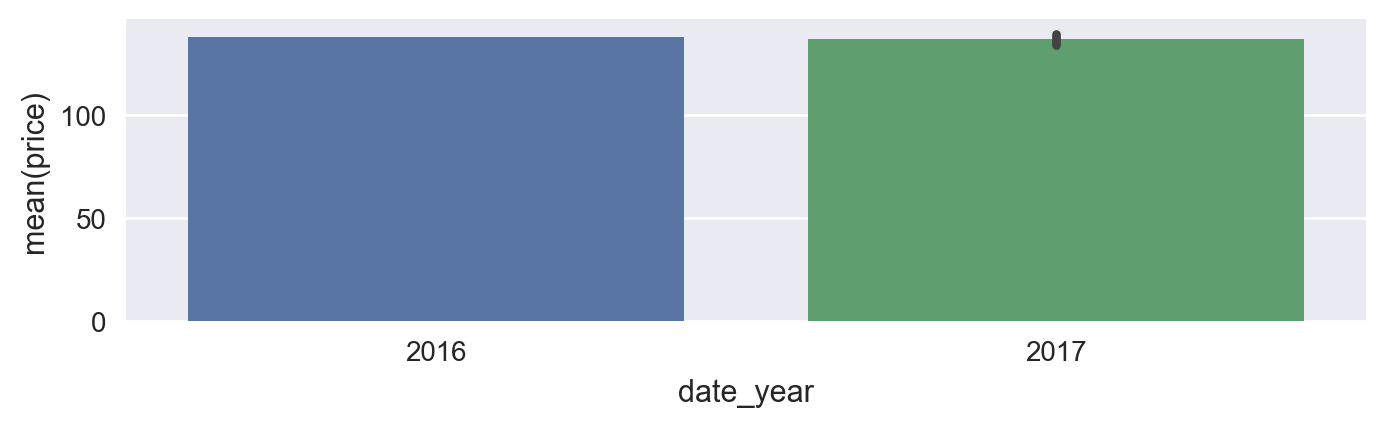

In [121]:
# Visualize data
plt.figure(figsize=(8,2), dpi=(200))
x = df_calendar['date_year']
y = df_calendar['price']
sns.barplot(x=x,y=y)

In [122]:
# List the price data grouped by month
df_calendar.groupby(by='date_year').mean()['price']

date_year
2016    137.951375
2017    136.882590
Name: price, dtype: float64

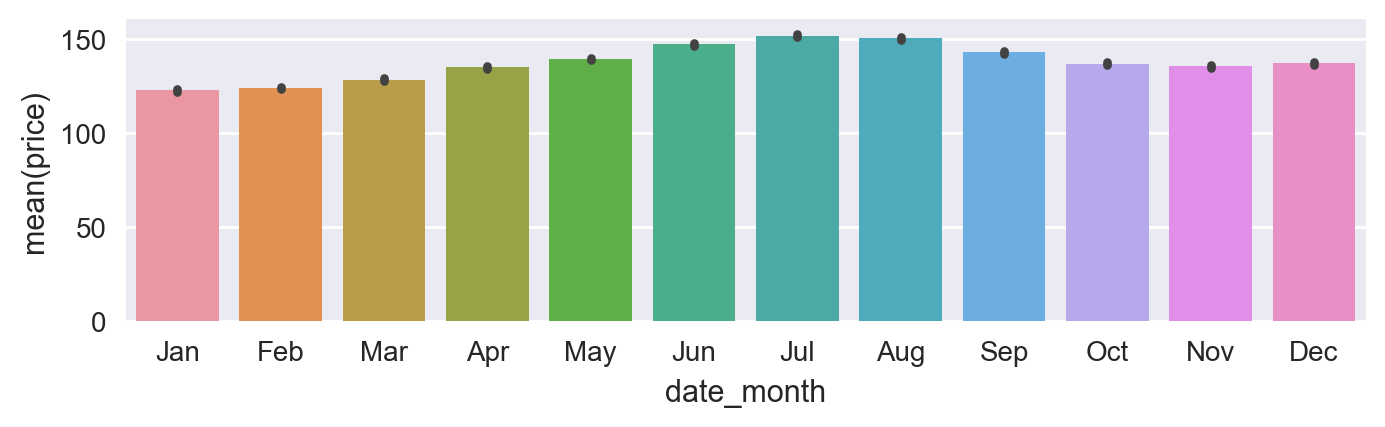

In [108]:
# Visualize data
plt.figure(figsize=(8,2), dpi=(200))
x = df_calendar['date_month']
y = df_calendar['price']
sns.barplot(x=x,y=y)

In [111]:
# List the price data grouped by month
df_calendar.groupby(by='date_month').mean()['price']

date_month
Apr    135.097005
Aug    150.656594
Dec    137.251835
Feb    124.293927
Jan    122.912176
Jul    152.094150
Jun    147.473137
Mar    128.644488
May    139.538183
Nov    135.688738
Oct    137.031939
Sep    143.255949
Name: price, dtype: float64

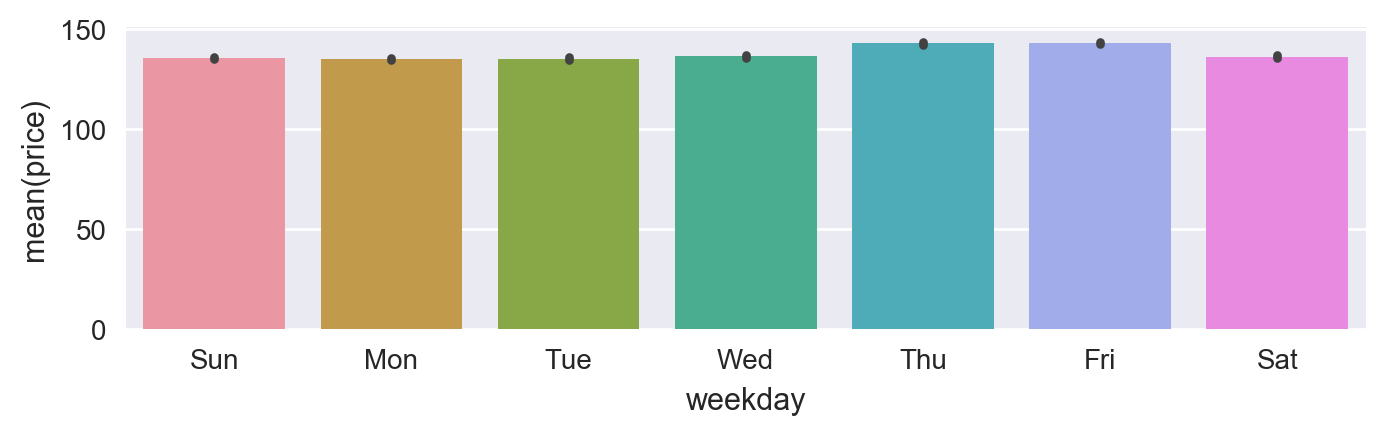

In [119]:
# Visualize data
plt.figure(figsize=(8,2), dpi=(200))
x = df_calendar['weekday']
y = df_calendar['price']
sns.barplot(x=x,y=y)

In [118]:
# List the price data grouped by month
df_calendar.groupby(by='weekday').mean()['price']

weekday
Fri    143.202136
Mon    135.408764
Sat    136.459941
Sun    135.676414
Thu    143.036294
Tue    135.447880
Wed    136.476032
Name: price, dtype: float64

### Calendar Data Insights
---
* It appears that their is about ~1.4mm rows of data with 4 feature columns. 
* The 'listing_id' is the only integer column which happens to be a unique id for each airbnb listing agent
* The 'date' column could be converted to a date object and possible further parsed into different sub-categories
* The 'available' column could be converted to a boolean type
* The 'price' column could be converted to a float type
* I performed all the necessary data cleaning and converting of types as detailed above. I also added a few additional features to assist with analysis later, like month, day of month, weekday etc. I then explored and cleaned up the null and duplicate data types in the price column which resulted in dropping ~32% of the rows leaving me with ~934,542 rows of data. 
---
** When is the best time to visit Seattle if you planning on staying in an AirBnb? **  
* Generally speaking, it appears that the data indicates that as each month passes the throughout the year the average or mean AirBnB price increase to a peak in July and then slowly decreases throughout the rest of the year.  
* The cheapest average month to stay in Seattle is in Januarary with an average price point of \$123
* The average price point peaks in July at \$152. 
* Additioanlly, drilling down into the weeekly price data it appears that Thursday and Friday's are the most expensive days of the week at \$143 and the least expensive days of the week appear to be on Sundays at \$135. 

### Listing Data Clean and Prepare

In [84]:
# Preview the data info
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
id                                  3818 non-null int64
listing_url                         3818 non-null object
scrape_id                           3818 non-null int64
last_scraped                        3818 non-null object
name                                3818 non-null object
summary                             3641 non-null object
space                               3249 non-null object
description                         3818 non-null object
experiences_offered                 3818 non-null object
neighborhood_overview               2786 non-null object
notes                               2212 non-null object
transit                             2884 non-null object
thumbnail_url                       3498 non-null object
medium_url                          3498 non-null object
picture_url                         3818 non-null object
xl_picture_url                      3498

In [86]:
# List column names
df_listings.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [87]:
# Preview a random sample of the data
df_listings.sample(5)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
3689,1100686,https://www.airbnb.com/rooms/1100686,20160104002432,2016-01-04,Tree top views in artsy Fremont,"Private ""tree top"" room is large and light w/...","Beautiful country in the city feel, overlookin...","Private ""tree top"" room is large and light w/...",none,"Self acclaimed ""center of the universe,"" I lov...",Accommodations can be made for an additional g...,Buses are very convenient and take you downtow...,https://a0.muscache.com/ac/pictures/53965077/2...,https://a0.muscache.com/im/pictures/53965077/2...,https://a0.muscache.com/ac/pictures/53965077/2...,https://a0.muscache.com/ac/pictures/53965077/2...,3921530,https://www.airbnb.com/users/show/3921530,Ann Petrich,2012-10-19,"Seattle, Washington, United States","I love art and ""creation."" I love to travel. ...",within a few hours,100%,100%,f,https://a2.muscache.com/ac/users/3921530/profi...,https://a2.muscache.com/ac/users/3921530/profi...,Fremont,3.0,3.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,t,"North 40th Street, Seattle, WA 98103, United S...",Fremont,Fremont,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.654452,-122.354403,t,House,Private room,3,1.0,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",NaN,$54.00,$380.00,"$1,300.00",$100.00,$35.00,3,$7.00,2,28,a week ago,t,20,42,72,347,2016-01-04,72,2014-05-25,2015-12-27,94.0,10.0,9.0,10.0,10.0,10.0,9.0,f,NaN,WASHINGTON,f,moderate,f,t,3,3.66
1972,9075558,https://www.airbnb.com/rooms/9075558,20160104002432,2016-01-04,Private Bedroom in a Modern House,My brand new townhouse on the third row from s...,NaN,My brand new townhouse on the third row from s...,none,"15-20 minutes to the downtown by E-line, while...",NaN,"Vey close bus stop, 15-20 minutes to the downt...",https://a2.muscache.com/ac/pictures/14fd93c5-1...,https://a2.muscache.com/im/pictures/14fd93c5-1...,https://a2.muscache.com/ac/pictures/14fd93c5-1...,https://a2.muscache.com/ac/pictures/14fd93c5-1...,7237936,https://www.airbnb.com/users/show/7237936,Mostafa,2013-07-02,"Seattle, Washington, United States",Software Engineer in Facebook living in Seattl...,within an hour,100%,100%,f,https://a2.muscache.com/ac/users/7237936/profi...,https://a2.muscache.com/ac/users/7237936/profi...,NaN,1.0,1.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,"North 97th Street, Seattle, WA 98103, United S...",NaN,Greenwood,Other neighborhoods,Seattle,WA,98103,Seattle,"Seattle, WA",US,United States,47.700483,-122.346562,f,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Free Parking...",NaN,$34.00,NaN,NaN,NaN

In [225]:
## Explore Listing Dataframe
# df_listings.info()          # df info

In [226]:
## Explore Listing Dataframe
# df_listings.head()          # preview data

In [227]:
# Sub-set dataframe
df = df_listings[['id', 'host_name', 'host_response_time','host_response_rate',
                 'host_acceptance_rate', 'host_is_superhost', 'city', 'state','zipcode',
                 'property_type','room_type','accommodates','bathrooms','bedrooms','beds',
                 'price','cleaning_fee','review_scores_rating','number_of_reviews'
                ]].copy()
df.head()

,id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,review_scores_rating,number_of_reviews
0,241032,Maija,within a few hours,96%,100%,f,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$85.00,NaN,95.0,207
1,953595,Andrea,within an hour,98%,100%,t,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,$150.00,$40.00,96.0,43
2,3308979,Jill,within a few hours,67%,100%,f,Seattle,WA,98119,House,Entire home/apt,11,4.5,5.0,7.0,$975.00,$300.00,97.0,20
3,7421966,Emily,NaN,NaN,NaN,f,Seattle,WA,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,$100.00,NaN,NaN,0
4,278830,Emily,within an hour,100%,NaN,f,Seattle,WA,98119,House,Entire home/apt,6,2.0,3.0,3.0,$450.00,$125.00,92.0,38


In [228]:
def clean_data(df):
    df['host_is_superhost'] = df['host_is_superhost'].replace('t', True, regex=True).astype(bool)
    df['host_is_superhost'] = df['host_is_superhost'].replace('[f', False, regex=True).astype(bool)
    df['host_response_rate'] = df['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)/100
    df['host_acceptance_rate'] = df['host_acceptance_rate'].replace('[\%,]', '', regex=True).astype(float)/100
    df['review_scores_rating'] = df['review_scores_rating']/100
    df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
    df['cleaning_fee'] = df['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

clean_data(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 19 columns):
id                      3818 non-null int64
host_name               3816 non-null object
host_response_time      3295 non-null object
host_response_rate      3295 non-null float64
host_acceptance_rate    3045 non-null float64
host_is_superhost       3818 non-null bool
city                    3818 non-null object
state                   3818 non-null object
zipcode                 3811 non-null object
property_type           3817 non-null object
room_type               3818 non-null object
accommodates            3818 non-null int64
bathrooms               3802 non-null float64
bedrooms                3812 non-null float64
beds                    3817 non-null float64
price                   3818 non-null float64
cleaning_fee            2788 non-null float64
review_scores_rating    3171 non-null float64
number_of_reviews       3818 non-null int64
dtypes: bool(1), float64(8), int64(

In [229]:
df.head()

,id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,city,state,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,cleaning_fee,review_scores_rating,number_of_reviews
0,241032,Maija,within a few hours,0.96,1.0,True,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,85.0,NaN,0.95,207
1,953595,Andrea,within an hour,0.98,1.0,True,Seattle,WA,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,150.0,40.0,0.96,43
2,3308979,Jill,within a few hours,0.67,1.0,True,Seattle,WA,98119,House,Entire home/apt,11,4.5,5.0,7.0,975.0,300.0,0.97,20
3,7421966,Emily,NaN,NaN,NaN,True,Seattle,WA,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,100.0,NaN,NaN,0
4,278830,Emily,within an hour,1.00,NaN,True,Seattle,WA,98119,House,Entire home/apt,6,2.0,3.0,3.0,450.0,125.0,0.92,38


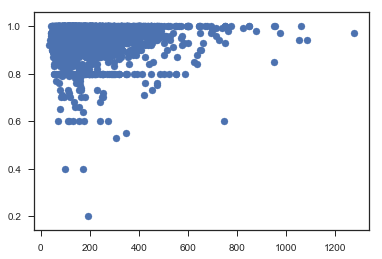

In [242]:
x = df["review_scores_rating"]
y = df['total_price'] = df['price'] + df['cleaning_fee']
sc = plt.scatter(x=y, y=x)
plt.show(sc)